# In this notebook I write the script to call MuhRec on all time bins created by the TOF_BinImages

## I furthermore create the picture for the Neuwave abstract 

In [444]:
%%time
from subprocess import call
from math import fmod
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import os
import shutil
import numpy as np
%matplotlib inline
# %matplotlib notebook

from astropy.io import fits
import xml.etree.ElementTree as ET

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

from Orthogonal_views import PlotOrtogonalViews
import matplotlib.gridspec as gridspec

from matplotlib.animation import FuncAnimation

from mpl_toolkits.mplot3d import Axes3D
# import AdvancedBraggEdgeFitting_v2

Wall time: 0 ns


In [ ]:
%%time

projpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/"
destpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin" #it is actually 250! TO CORRECT
# path to the application
muhrec=r"C:/Users/carminati_c/Desktop/imagingscience/muhrecCLI.exe"
# cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Recon_WhiteBeam/ReconConfig.xml"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam/ReconConfig.xml"
#first try
# filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00000.fits"
# obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData\RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_ob_binned_00000.fits"
obfirstindex ="projections:obfirstindex=2"
obcount ="projections:obcount=2"
# path = r"/bin0000"
# outputpath="matrix:path="+destpath+path

# print(outputpath)



first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    path = r"/bin"+str(i).zfill(4)
    outputpath="matrix:path="+destpath+path

    obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    print(filemask)
    print(outputpath)
#     print(obmask)

    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

#     print(muhrec)
#     print(cfgpath)
    call([muhrec, "-f", cfgpath, filemask, obmask, obfirstindex, obcount, outputpath])


In [ ]:
# here I create different ReconConfig for different bins, as I need to change the input of the BBLogNorm external images

# Open original file
et = ET.parse('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam_BBcorrected/ReconConfig.xml')
root = et.getroot()


#whit this I find all modules in the pre-processing chain
for module in root.findall('./processchain/preprocessing/module'):
    name= module.find('modulename')
    print(name.text)



BBmodule = root.find('./processchain/preprocessing/module/modulename') ## find the first one, which is always the BBLogNorm
BB_OB_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_OB_ext_name')
BB_sample_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_sample_ext_name')

filemask = root.find('./projections/filemask')
outputpath = root.find('./matrix/path')
obmask = root.find('./projections/obfilemask')
obfirstindex = root.find('./projections/obfirstindex')
projpath = root.find('./projections/path')
projrefpath = root.find('./projections/referencepath')

## Uncomment this to check the original texts
# print(BBmodule)
# print(BBmodule.text)
# print(BB_OB_ext_name.text)
# print(BB_sample_ext_name.text)
# print(filemask.text)
# print(outputpath.text)
# print(obmask.text)
# print(obfirstindex.text)
# print(projpath.text)
# print(projrefpath.text)



# Loop over the bins to create the ReconConfig
first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    destpath=r"D:Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin_249_BBcorrected" 
    path = r"/bin"+str(i).zfill(4)+"/"
    BB_OB_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_0000.fits'
    BB_sample_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_####.fits'
    filemask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned\IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    outputpath.text = destpath+path
    obmask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    obfirstindex.text=str(2)
    projpath.text=' '
    projrefpath.text=' '

    fileconfigpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations'
    fileconfigname = '/ReconConfig_bin'+str(i).zfill(4)+'.xml'
    et.write(fileconfigpath+fileconfigname) # It works!!
    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

In [ ]:
# Here I run MuhRec in a loop loading the different ReconConfig that I have created in the previous cell
muhrec=r"C:/Users/carminati_c/muhrec/muhrecCLI.exe"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(0).zfill(4)+".xml"
%%time

for i in range(first_bin, last_bin):
    cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(i).zfill(4)+".xml"
    print('Running: ...... ', cfgpath)
    call([muhrec, "-f", cfgpath]) # It does!

In [ ]:
# Here i try to make some plots

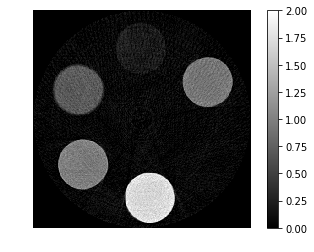

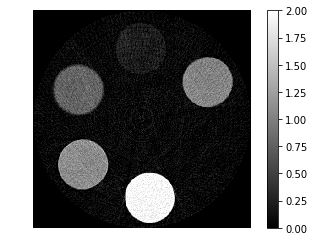

In [4]:
# img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\Recon_WhiteBeam\slice_0405.tif')
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam.tif') # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam_BB.tif') # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')


In [ ]:
# TODO:
# [OK] read this very sama image for the entire spectrum
# [] bin accordingly the spectrum
# [] make the plots in some meaningful ROIs
# RoiS

In [119]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img[:,:,i]=io.imread(filename)
    print(filename)

(476, 476, 165)
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0000\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0001\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0002\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0003\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0004\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0005\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0006\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0066\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0067\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0068\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0069\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0070\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0071\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0072\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0073\slice_0

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0135\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0136\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0137\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0138\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0139\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0140\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0141\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0142\slice_0

(476, 476, 165)


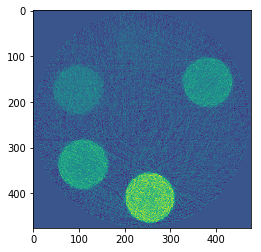

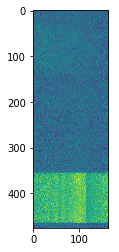

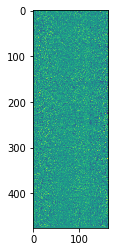

In [5]:
# io.imshow(spectrum_img[:,:,80])
# io.imshow(img_WB[150:200,80:140]) #Ti
# io.imshow(img_WB[55:100,200:250]) #Fe
# io.imshow(img_WB[300:350, 80:120]) #Pb
#io.imshow(img_WB[128:180,350:400]) #Ni
#io.imshow(img_WB[380:430,230:280]) #Cu a little bit high number, no?
plt.figure()
plt.imshow(spectrum_img[:,:,100])

plt.figure()
plt.imshow(spectrum_img[:,250,:])

plt.figure()
plt.imshow(spectrum_img[250,:,:])

print(np.shape(spectrum_img))


In [120]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
    print(filename)

(476, 476, 165)
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0000\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0001\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0002\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0003\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0004\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0005\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0006\slice_0405.tif
D:\Kaestner\ISIS_I

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0064\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0065\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0066\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0067\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0068\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0069\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0070\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB173004

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0126\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0127\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0128\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0129\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0130\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0131\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0132\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB173004

In [ ]:
# TODO: make this picture much nicer

fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(spectrum_img_BB.shape[0])/float(spectrum_img_BB.shape[1]),1]
mywidth_ratios = [1, float(spectrum_img_BB.shape[1])/float(spectrum_img_BB.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViews(spectrum_img_BB,gs,fig,'title', -0.1, 3.0, 0.055)
# plt.savefig('CT_ref_OS.pdf')

In [121]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)

In [122]:
def tof2l(tof):
    l=lambda0+h/m*(tof-t0)/(L)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L)*m/h
    return tof

In [123]:
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0

In [124]:
myLambda = tof2l(myTOF)

(2971,)


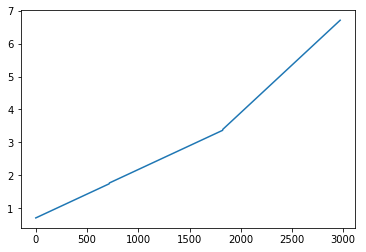

In [125]:
plt.plot(myLambda)
print(np.shape(myLambda))

In [126]:
2970/165

18.0

In [134]:
#spectrum TI ROI: [150:200,80:140]
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:140,i])
    Pb[i] = np.median(spectrum_img[55:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:120,i])
    Cu[i] = np.median(spectrum_img[128:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:140,i])
    Pb_BB[i] = np.median(spectrum_img_BB[55:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:120,i])
    Cu_BB[i] = np.median(spectrum_img_BB[128:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    

In [135]:
lambda_bin = myLambda[1::18]

In [136]:
print(np.shape(lambda_bin))
print(np.shape(Ti))
print(np.shape(myLambda))

(165,)
(165,)
(2971,)


In [137]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')


(300, 2)


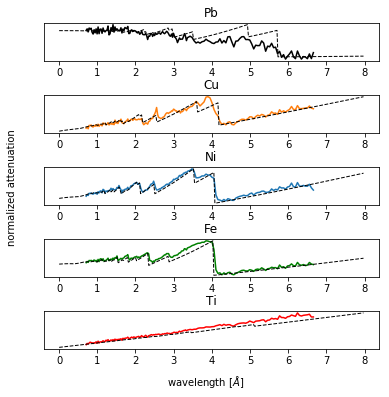

In [138]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 6))


plt.subplot(513)
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti/np.max(Ti),'r')
plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.subplots_adjust(hspace=0.9)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center')
fig.text(0.04, 0.5, 'normalized attenuation', va='center', rotation='vertical')

plt.savefig('spectra_plots_normalized.tiff')
# plt.savefig('spectra_plots_normalized.pdf')

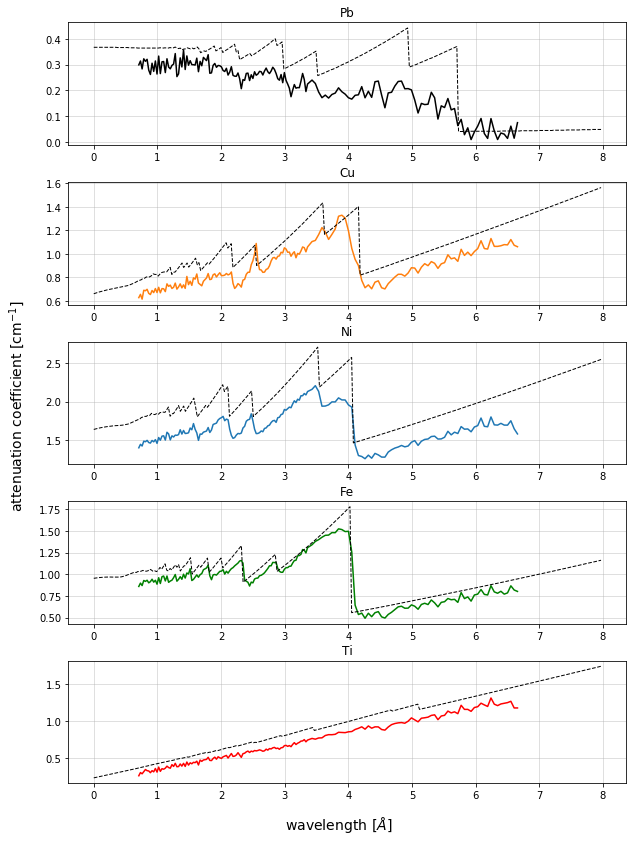

In [462]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 
plt.grid(alpha=0.5)


plt.subplot(514)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')
plt.grid(alpha=0.5)

plt.subplot(515)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')
plt.grid(alpha=0.5)

plt.subplot(511)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')
plt.grid(alpha=0.5)

plt.subplot(512)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')
plt.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB.png', dpi=500)
plt.savefig('spectra_plots.pdf')

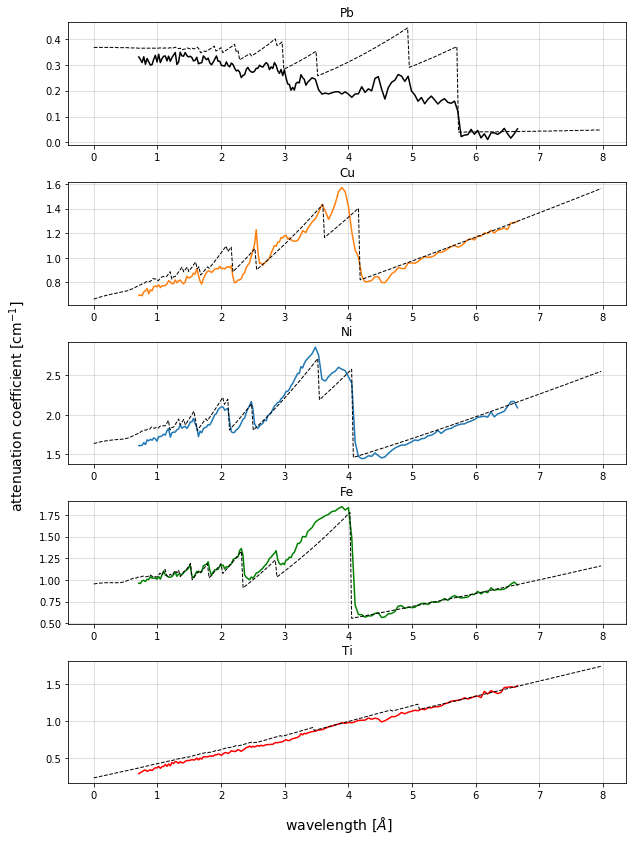

In [461]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 
plt.grid(alpha=0.5)

plt.subplot(514)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')
plt.grid(alpha=0.5)

plt.subplot(515)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')
plt.grid(alpha=0.5)

plt.subplot(511)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')
plt.grid(alpha=0.5)

plt.subplot(512)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')
plt.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# plt.tight_layout()
plt.savefig('spectra_plots_BBcorrected.tiff')
plt.savefig('spectra_plots_BBcorrected.pdf')
plt.savefig('spectra_plots_BBcorrected.png', dpi=500)

Text(0.5, 1.0, 'Cu')

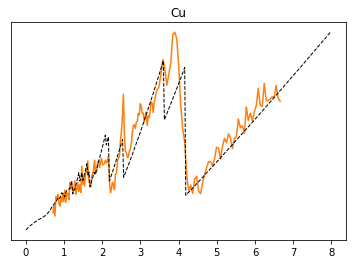

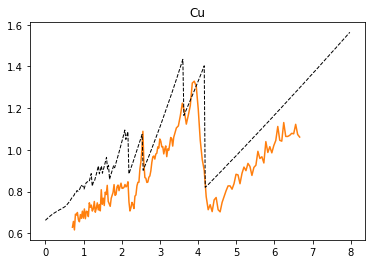

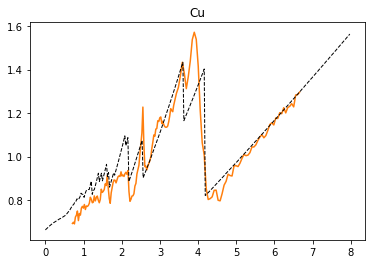

In [143]:
plt.figure()
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.figure()
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')


plt.figure()
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')

Text(0.5, 1.0, 'Fe')

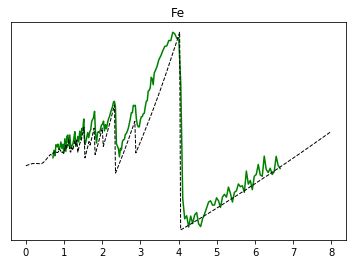

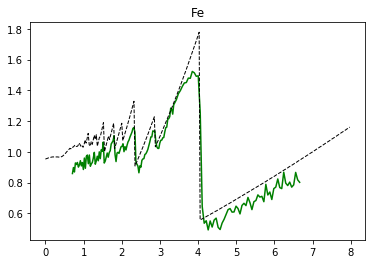

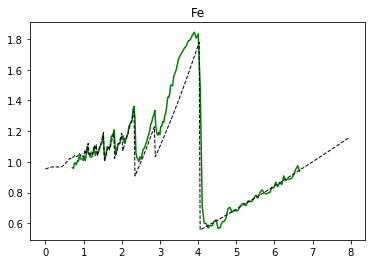

In [145]:
plt.figure()
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

Text(0.5, 1.0, 'Ti')

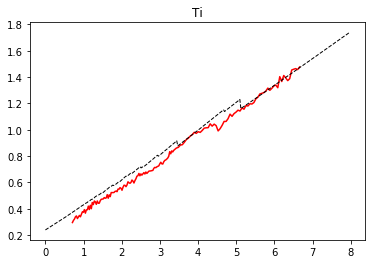

In [146]:
# plt.figure()
# plt.plot(lambda_bin, Ti/np.max(Ti),'r')
# plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
# plt.yticks([], [])
# plt.title('Ti')

# plt.figure()
# plt.plot(lambda_bin, Ti,'r')
# plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
# plt.title('Ti')

plt.figure()
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

# plt.figure()
# plt.plot(lambda_bin, Ti_BB,'r')
# plt.plot(lambda_bin, Ti,'--k',linewidth=1)
# plt.title('Ti')

Text(0.5, 1.0, 'Pb')

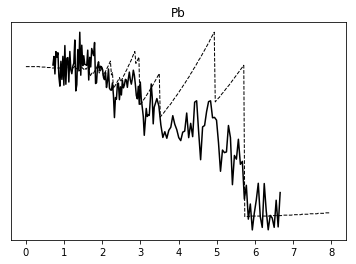

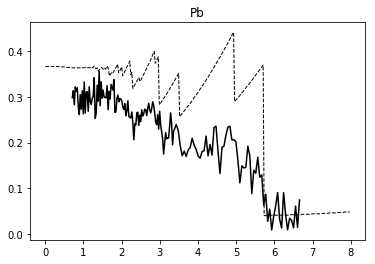

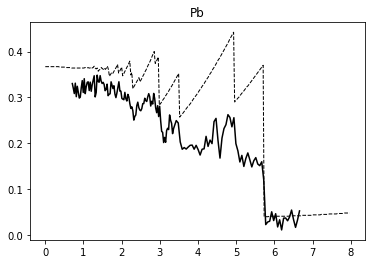

In [147]:
plt.figure()
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

Text(0.5, 1.0, 'Ni')

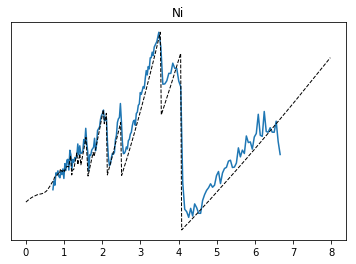

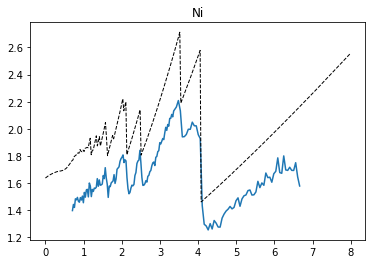

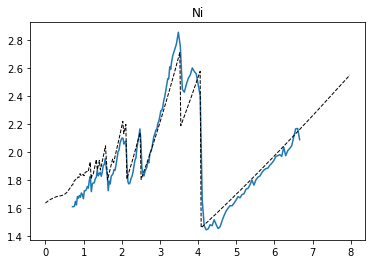

In [148]:
plt.figure()
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 

plt.figure()
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')

plt.figure()
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')


# 4D data analysis

In [16]:
# Here I read the 4D spectra.. It read!!
nBins=165 
nSlices = 190
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(275, 465):
        print(j)
        print(j-275)
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         print(filename)
        spectrum_img_BB_4D[:,:,j-275,i]= io.imread(filename)
#     print(filename)

(476, 476, 190, 165)
nBin: .... 0
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409


420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 6
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90


377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 12
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
4

328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183

277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
41

425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 29
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371


382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 35
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322

333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
46

283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
14

429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 52
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100


386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 58
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51


338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 64
275
0
2

288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148

433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 75
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104


390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 81
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331


342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 87
275
0
276
1
277
2
278
3
279
4
280
5

292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427

437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 98
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108


393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 104
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59

345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 110
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
2

294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
4

438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 121
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109

394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 127
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60


346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 133
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
28

295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154


439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 144
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110

395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 150
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
286
11
287
12
288
13
289
14
290
15
291
16
292
17
293
18
294
19
295
20
296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
3

347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155
431
156
432
157
433
158
434
159
435
160
436
161
437
162
438
163
439
164
440
165
441
166
442
167
443
168
444
169
445
170
446
171
447
172
448
173
449
174
450
175
451
176
452
177
453
178
454
179
455
180
456
181
457
182
458
183
459
184
460
185
461
186
462
187
463
188
464
189
nBin: .... 156
275
0
276
1
277
2
278
3
279
4
280
5
281
6
282
7
283
8
284
9
285
10
28

296
21
297
22
298
23
299
24
300
25
301
26
302
27
303
28
304
29
305
30
306
31
307
32
308
33
309
34
310
35
311
36
312
37
313
38
314
39
315
40
316
41
317
42
318
43
319
44
320
45
321
46
322
47
323
48
324
49
325
50
326
51
327
52
328
53
329
54
330
55
331
56
332
57
333
58
334
59
335
60
336
61
337
62
338
63
339
64
340
65
341
66
342
67
343
68
344
69
345
70
346
71
347
72
348
73
349
74
350
75
351
76
352
77
353
78
354
79
355
80
356
81
357
82
358
83
359
84
360
85
361
86
362
87
363
88
364
89
365
90
366
91
367
92
368
93
369
94
370
95
371
96
372
97
373
98
374
99
375
100
376
101
377
102
378
103
379
104
380
105
381
106
382
107
383
108
384
109
385
110
386
111
387
112
388
113
389
114
390
115
391
116
392
117
393
118
394
119
395
120
396
121
397
122
398
123
399
124
400
125
401
126
402
127
403
128
404
129
405
130
406
131
407
132
408
133
409
134
410
135
411
136
412
137
413
138
414
139
415
140
416
141
417
142
418
143
419
144
420
145
421
146
422
147
423
148
424
149
425
150
426
151
427
152
428
153
429
154
430
155

In [92]:
# here I divide the different materials
print(np.shape(spectrum_img_BB_4D))
# Save the loaded imgs in a npy datasets, in case I have to reload again without reading all images..
# from tempfile import TemporaryFile
# fourD_data = TemporaryFile()
np.save('fourD_data.npy', spectrum_img_BB_4D) # does not seem to have saved anything



(476, 476, 190, 165)


In [216]:
# I divide the 4D regions with the different materials
Ti_4D = spectrum_img_BB_4D[150:200,80:140,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:120,:,:]
Cu_4D = spectrum_img_BB_4D[128:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[55:100,200:250,:,:]
Bg_4D = spectrum_img_BB_4D[50:100, 100:150, :,:]


0.036607025473192334
0.26874146994548176


In [464]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)
Bg_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,:,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,:,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,:,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,:,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,:,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,:,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,:,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,:,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,:,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,:,i])
    Bg_std[i] = np.std(Bg_4D[:,:,:,i])
    


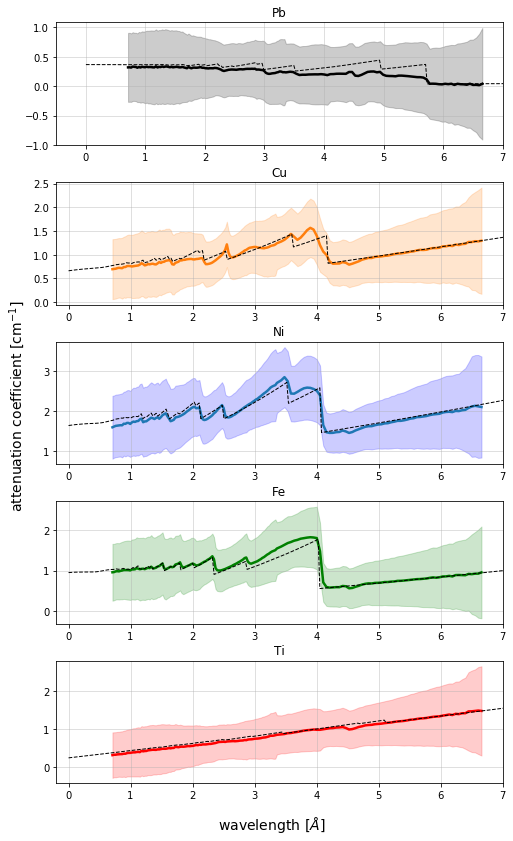

In [465]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('4D_spectra.png', dpi=300)

# plt.savefig('spectra_plots.tiff')
# plt.savefig('spectra_plots.pdf'))

In [466]:
# Analysis on one central slide

print(np.shape(Ti_4D))
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])


(50, 60, 190, 165)


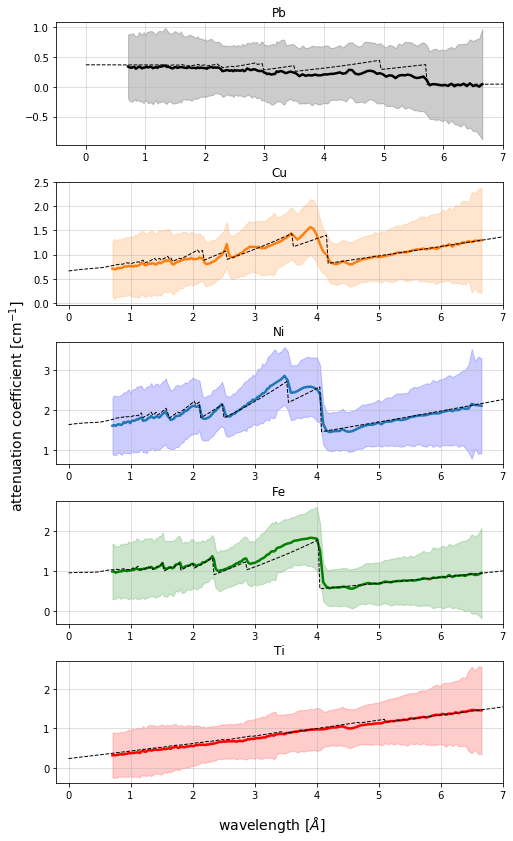

In [467]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.grid(alpha=0.5)
plt.xlim([-0.2,7])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('3D_spectra.png', dpi=300)

In [468]:
print(np.shape(Ti_4D))
print(np.shape(Fe_4D))
print(np.shape(Cu_4D))
print(np.shape(Pb_4D))

Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[35,35,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[35,35,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[35,35,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[35,35,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[35,35,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[35,35,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[35,35,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[35,35,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[35,35,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[35,35,100,i])

(50, 60, 190, 165)
(50, 40, 190, 165)
(52, 50, 190, 165)
(45, 50, 190, 165)


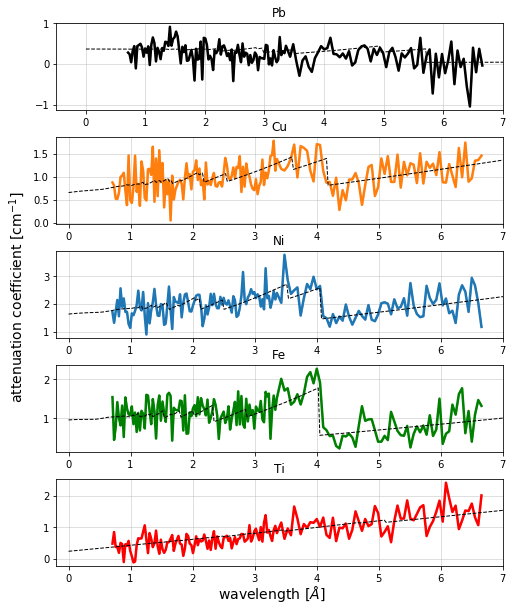

In [469]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('2D_spectra.png', dpi=300)

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


fig size: 72.0 DPI, size in inches [ 8. 14.]
timestep 0
timestep 0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49


ValueError: unknown file extension: .avi

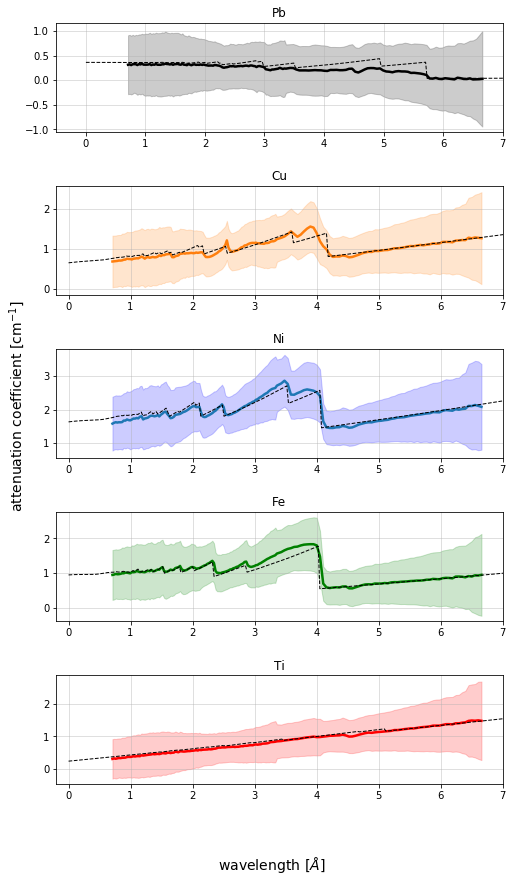

In [480]:
#Here i Try to make an animated plot out of the various plots


# This is the part that does not change:

# fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10))

fig = plt.figure(figsize=(8, 14))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.grid(alpha=0.5)
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.grid(alpha=0.5)
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.grid(alpha=0.5)
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.grid(alpha=0.5)
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.grid(alpha=0.5)
axCu.set_xlim([-0.2,7])
axCu.set_title('Cu')

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))


def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    Ti_4D_av = np.zeros(nBins)
    Ti_4D_std = np.zeros(nBins)
    Fe_4D_av = np.zeros(nBins)
    Fe_4D_std = np.zeros(nBins)
    Cu_4D_av = np.zeros(nBins)
    Cu_4D_std = np.zeros(nBins)
    Pb_4D_av = np.zeros(nBins)
    Pb_4D_std = np.zeros(nBins)
    Ni_4D_av = np.zeros(nBins)
    Ni_4D_std = np.zeros(nBins)

    for i in range(0,165):
        Ti_4D_av[i] = np.mean(Ti_4D[35-j:35+j,35-j:35+j,100,i])
        Ti_4D_std[i] = np.std(Ti_4D[35-j:35+j,35-j:35+j,100,i])
        Fe_4D_av[i] = np.mean(Fe_4D[35-j:35+j,35-j:35+j,100,i])
        Fe_4D_std[i] = np.std(Fe_4D[35-j:35+j,35-j:35+j,100,i])
        Cu_4D_av[i] = np.mean(Cu_4D[35-j:35+j,35-j:35+j,100,i])
        Cu_4D_std[i] = np.std(Cu_4D[35-j:35+j,35-j:35+j,100,i])
        Pb_4D_av[i] = np.mean(Pb_4D[35-j:35+j,35-j:35+j,100,i])
        Pb_4D_std[i] = np.std(Pb_4D[35-j:35+j,35-j:35+j,100,i])
        Ni_4D_av[i] = np.mean(Ni_4D[35-j:35+j,35-j:35+j,100,i])
        Ni_4D_std[i] = np.std(Ni_4D[35-j:35+j,35-j:35+j,100,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av)
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av)
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av)
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av)
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av)
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu

# Writer = matplotlib.animation.writers['FFMpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=200)
# anim.save('myspectragif_2D.gif',dpi=100, writer='pillow')
anim.save('myspectragif_2D.avi', writer='ffmpeg')
# anim.save('myspectragif_2D.mp4', writer=writer)

# im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
#                                    blit=True)
# im_ani.save('im.mp4', writer=writer)


fig size: 72.0 DPI, size in inches [ 8. 14.]
timestep 0
timestep 0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 0


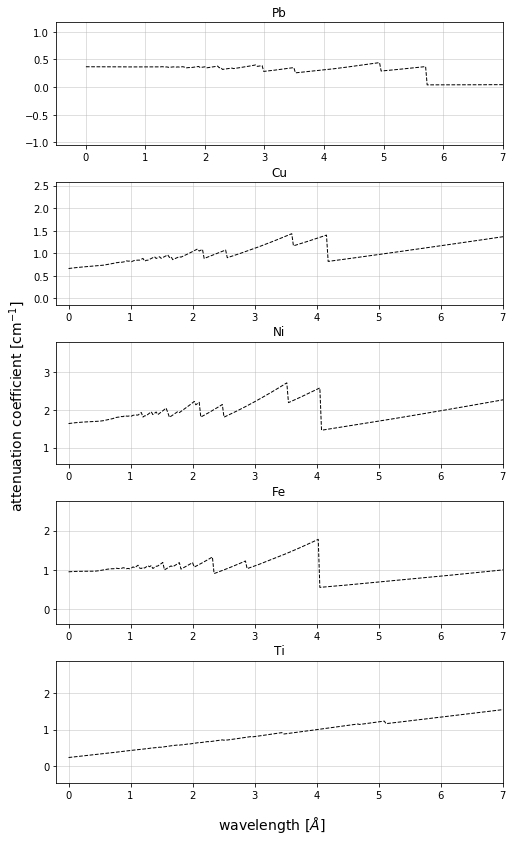

In [474]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])
        
fig = plt.figure(figsize=(8, 14))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.set_xlim([-0.2,7])
axCu.set_title('Cu')

axNi.grid(alpha=0.5)
axFe.grid(alpha=0.5)
axTi.grid(alpha=0.5)
axPb.grid(alpha=0.5)
axCu.grid(alpha=0.5)

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))


def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    Ti_4D_av = np.zeros(nBins)
    Ti_4D_std = np.zeros(nBins)
    Fe_4D_av = np.zeros(nBins)
    Fe_4D_std = np.zeros(nBins)
    Cu_4D_av = np.zeros(nBins)
    Cu_4D_std = np.zeros(nBins)
    Pb_4D_av = np.zeros(nBins)
    Pb_4D_std = np.zeros(nBins)
    Ni_4D_av = np.zeros(nBins)
    Ni_4D_std = np.zeros(nBins)

    for i in range(0,165):
#         Ti_4D_av[i] = np.mean(Ti_4D[:,:,100-j:100+j,i])
#         Ti_4D_std[i] = np.std(Ti_4D[:,:,100-j:100+j,i])
#         Fe_4D_av[i] = np.mean(Fe_4D[:,:,100-j:100+j,i])
#         Fe_4D_std[i] = np.std(Fe_4D[:,:,100-j:100+j,i])
#         Cu_4D_av[i] = np.mean(Cu_4D[:,:,100-j:100+j,i])
#         Cu_4D_std[i] = np.std(Cu_4D[:,:,100-j:100+j,i])
#         Pb_4D_av[i] = np.mean(Pb_4D[:,:,100-j:100+j,i])
#         Pb_4D_std[i] = np.std(Pb_4D[:,:,100-j:100+j,i])
#         Ni_4D_av[i] = np.mean(Ni_4D[:,:,100-j:100+j,i])
#         Ni_4D_std[i] = np.std(Ni_4D[:,:,100-j:100+j,i])
        Ti_4D_av[i] = np.mean(Ti_4D[:,:,10:10+j,i])
        Ti_4D_std[i] = np.std(Ti_4D[:,:,10:10+j,i])
        Fe_4D_av[i] = np.mean(Fe_4D[:,:,10:10+j,i])
        Fe_4D_std[i] = np.std(Fe_4D[:,:,10:10+j,i])
        Cu_4D_av[i] = np.mean(Cu_4D[:,:,10:10+j,i])
        Cu_4D_std[i] = np.std(Cu_4D[:,:,10:10+j,i])
        Pb_4D_av[i] = np.mean(Pb_4D[:,:,10:10+j,i])
        Pb_4D_std[i] = np.std(Pb_4D[:,:,10:10+j,i])
        Ni_4D_av[i] = np.mean(Ni_4D[:,:,10:10+j,i])
        Ni_4D_std[i] = np.std(Ni_4D[:,:,10:10+j,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av)
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av)
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av)
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av)
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av)
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu


anim = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=200)
anim.save('myspectragif_3D.gif',dpi=100, writer='pillow')

In [176]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,0:50,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,0:50,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,0:50,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,0:50,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,0:50,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,0:50,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,0:50,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,0:50,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,0:50,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,0:50,i])

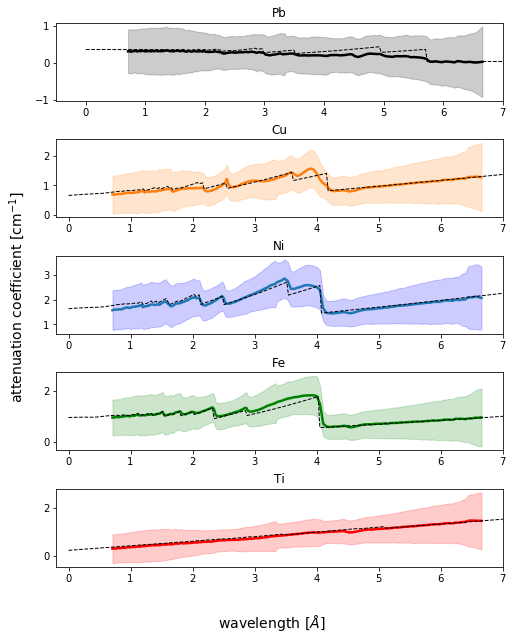

In [177]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.title('Cu')

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_50slices.png', dpi=300)

In [337]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,0:10,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,0:10,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,0:10,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,0:10,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,0:10,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,0:10,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,0:10,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,0:10,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,0:10,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,0:10,i])

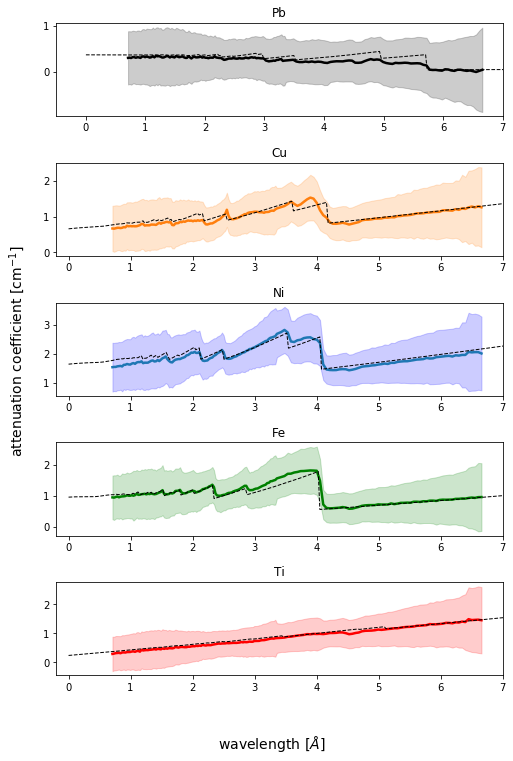

In [340]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 12))


plt.subplot(513)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.title('Cu')

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('spectra_10slices.png', dpi=300)

fig size: 72.0 DPI, size in inches [ 8. 10.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74


ValueError: unknown file extension: .avi

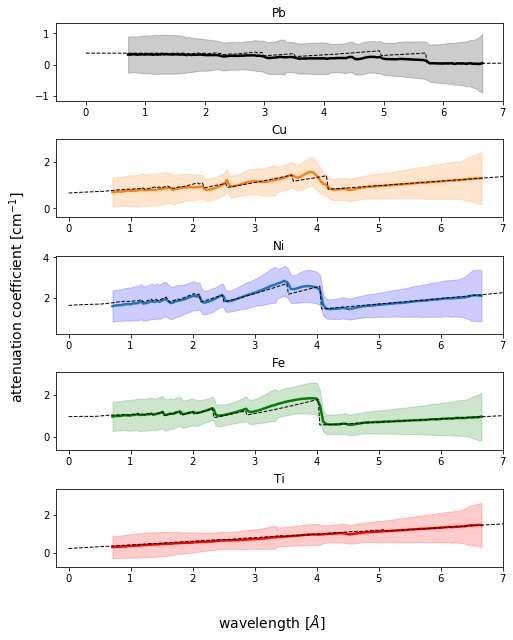

In [384]:
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)

for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,100,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,100,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,100,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,100,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,100,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,100,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,100,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,100,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,100,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,100,i])
        
fig = plt.figure(figsize=(8, 10))
axNi = fig.add_subplot(513)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.set_title('Ni') 

axFe = fig.add_subplot(514)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.set_title('Fe')

axTi = fig.add_subplot(515)
lineTi, = axTi.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
fillTi = axTi.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
axTi.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
axTi.set_xlim([-0.2,7])
axTi.set_title('Ti')

axPb = fig.add_subplot(511)
linePb, = axPb.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
fillPb = axPb.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
axPb.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
axPb.set_xlim([-0.5,7])
axPb.set_title('Pb')

axCu = fig.add_subplot(512)
lineCu, = axCu.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
fillCu = axCu.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
axCu.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
axCu.set_xlim([-0.2,7])
axCu.set_title('Cu')

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

timesteps=75
Ti_4D_av = np.zeros([nBins,timesteps])
Ti_4D_std = np.zeros([nBins,timesteps])
Fe_4D_av = np.zeros([nBins,timesteps])
Fe_4D_std = np.zeros([nBins,timesteps])
Cu_4D_av = np.zeros([nBins,timesteps])
Cu_4D_std = np.zeros([nBins,timesteps])
Pb_4D_av = np.zeros([nBins,timesteps])
Pb_4D_std = np.zeros([nBins,timesteps])
Ni_4D_av = np.zeros([nBins,timesteps])
Ni_4D_std = np.zeros([nBins,timesteps])
Bg_4D_std = np.zeros([nBins,timesteps])

def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    
    if j<25:
        for i in range(0,165):
            Ti_4D_av[i,j] = np.mean(Ti_4D[35-j:36+j,35-j:36+j,100,i])
            Ti_4D_std[i,j] = np.std(Ti_4D[35-j:36+j,35-j:36+j,100,i])
            Fe_4D_av[i,j] = np.mean(Fe_4D[35-j:36+j,35-j:36+j,100,i])
            Fe_4D_std[i,j] = np.std(Fe_4D[35-j:36+j,35-j:36+j,100,i])
            Cu_4D_av[i,j] = np.mean(Cu_4D[35-j:36+j,35-j:36+j,100,i])
            Cu_4D_std[i,j] = np.std(Cu_4D[35-j:36+j,35-j:36+j,100,i])
            Pb_4D_av[i,j] = np.mean(Pb_4D[35-j:36+j,35-j:36+j,100,i])
            Pb_4D_std[i,j] = np.std(Pb_4D[35-j:36+j,35-j:36+j,100,i])
            Ni_4D_av[i,j] = np.mean(Ni_4D[35-j:36+j,35-j:36+j,100,i])
            Ni_4D_std[i,j] = np.std(Ni_4D[35-j:36+j,35-j:36+j,100,i])
            Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,i])
    else: 
        for i in range(0,165):
#             Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,10:10+j,i])
#             Ti_4D_std[i,j] = np.std(Ti_4D[:,:,10:10+j,i])
#             Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,10:10+j,i])
#             Fe_4D_std[i,j] = np.std(Fe_4D[:,:,10:10+j,i])
#             Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,10:10+j,i])
#             Cu_4D_std[i,j] = np.std(Cu_4D[:,:,10:10+j,i])
#             Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,10:10+j,i])
#             Pb_4D_std[i,j] = np.std(Pb_4D[:,:,10:10+j,i])
#             Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,10:10+j,i])
#             Ni_4D_std[i,j] = np.std(Ni_4D[:,:,10:10+j,i])
            Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,100-j:101+j,i])
            Ti_4D_std[i,j] = np.std(Ti_4D[:,:,100-j:101+j,i])
            Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,100-j:101+j,i])
            Fe_4D_std[i,j] = np.std(Fe_4D[:,:,100-j:101+j,i])
            Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,100-j:101+j,i])
            Cu_4D_std[i,j] = np.std(Cu_4D[:,:,100-j:101+j,i])
            Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,100-j:101+j,i])
            Pb_4D_std[i,j] = np.std(Pb_4D[:,:,100-j:101+j,i])
            Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,100-j:101+j,i])
            Ni_4D_std[i,j] = np.std(Ni_4D[:,:,100-j:101+j,i])
            Bg_4D_std[i,j] = np.std(Bg_4D[:,:,50:150,i])
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.


    axFe.collections.clear()
    axNi.collections.clear()
    axTi.collections.clear()
    axCu.collections.clear()
    axPb.collections.clear()
    
    lineNi.set_ydata(Ni_4D_av[:,j])
    fillNi = axNi.fill_between(lambda_bin, Ni_4D_av[:,j]-1.96*Ni_4D_std[:,j], Ni_4D_av[:,j]+1.96*Ni_4D_std[:,j], color='b', alpha=0.2)


    lineFe.set_ydata(Fe_4D_av[:,j])
    fillFe = axFe.fill_between(lambda_bin, Fe_4D_av[:,j]-1.96*Fe_4D_std[:,j], Fe_4D_av[:,j]+1.96*Fe_4D_std[:,j], color='g', alpha=0.2)

    lineTi.set_ydata(Ti_4D_av[:,j])
    fillTi =axTi.fill_between(lambda_bin, Ti_4D_av[:,j]-1.96*Ti_4D_std[:,j], Ti_4D_av[:,j]+1.96*Ti_4D_std[:,j], color='r', alpha=0.2)

    linePb.set_ydata(Pb_4D_av[:,j])
    fillPb = axPb.fill_between(lambda_bin, Pb_4D_av[:,j]-1.96*Pb_4D_std[:,j], Pb_4D_av[:,j]+1.96*Pb_4D_std[:,j], color='k', alpha=0.2)


    lineCu.set_ydata(Cu_4D_av[:,j])
   
    fillCu = axCu.fill_between(lambda_bin, Cu_4D_av[:,j]-1.96*Cu_4D_std[:,j], Cu_4D_av[:,j]+1.96*Cu_4D_std[:,j], color='C1', alpha=0.2)

    return lineNi,fillNi, lineFe, fillFe, lineTi, fillTi, lineCu, fillCu


anim = FuncAnimation(fig, update, frames=np.arange(0, 75), interval=200)
anim.save('myspectragif_alltogether.gif',dpi=100, writer='pillow')

In [264]:
pixel_num = np.empty(75)
j=0
for j in range(0,25):
    pixel_num[j] = np.size(Ti_4D[35-j:36+j,35-j:36+j,100,100])

    
for j in range(0,50):
    pixel_num[j+25] = np.size(Ti_4D[:,:,100-j:101+j,100])

# print(pixel_num)
x_bins = np.arange(1,166)
# print(x_bins)

[1.000e+00 9.000e+00 2.500e+01 4.900e+01 8.100e+01 1.210e+02 1.690e+02
 2.250e+02 2.890e+02 3.610e+02 4.410e+02 5.290e+02 6.250e+02 7.290e+02
 8.410e+02 9.300e+02 1.023e+03 1.120e+03 1.221e+03 1.326e+03 1.435e+03
 1.548e+03 1.665e+03 1.786e+03 1.911e+03 3.000e+03 9.000e+03 1.500e+04
 2.100e+04 2.700e+04 3.300e+04 3.900e+04 4.500e+04 5.100e+04 5.700e+04
 6.300e+04 6.900e+04 7.500e+04 8.100e+04 8.700e+04 9.300e+04 9.900e+04
 1.050e+05 1.110e+05 1.170e+05 1.230e+05 1.290e+05 1.350e+05 1.410e+05
 1.470e+05 1.530e+05 1.590e+05 1.650e+05 1.710e+05 1.770e+05 1.830e+05
 1.890e+05 1.950e+05 2.010e+05 2.070e+05 2.130e+05 2.190e+05 2.250e+05
 2.310e+05 2.370e+05 2.430e+05 2.490e+05 2.550e+05 2.610e+05 2.670e+05
 2.730e+05 2.790e+05 2.850e+05 2.910e+05 2.970e+05]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  5

In [ ]:
# i Recompute the SNR in a much smaller scale

In [418]:
timesteps=10
Ti_4D_av = np.zeros([timesteps, nBins])
Ti_4D_std = np.zeros([timesteps, nBins])
Fe_4D_av = np.zeros([timesteps, nBins])
Fe_4D_std = np.zeros([timesteps, nBins])
Cu_4D_av = np.zeros([timesteps, nBins])
Cu_4D_std = np.zeros([timesteps, nBins])
Pb_4D_av = np.zeros([timesteps, nBins])
Pb_4D_std = np.zeros([timesteps, nBins])
Ni_4D_av = np.zeros([timesteps, nBins])
Ni_4D_std = np.zeros([timesteps, nBins])
Bg_4D_std = np.zeros([timesteps, nBins])
Bg_4D_av = np.zeros([timesteps, nBins])

num_pixels= np.zeros(timesteps)


for j in range(0, nBins):
    curr_x1=35
    curr_x2=35
    curr_y1=35
    curr_y2=35
    for i in range(1,timesteps):
        if i % 2 == 0: #Even
            curr_x2=curr_x2+1
            curr_y2=curr_y2+1
        else: #Odd
            curr_x1 = curr_x1-1
            curr_y1 = curr_y1-1
        
        Ti_4D_av[i,j] = np.mean(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ti_4D_std[i,j] = np.std(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Fe_4D_av[i,j] = np.mean(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Fe_4D_std[i,j] = np.std(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Cu_4D_av[i,j] = np.mean(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Cu_4D_std[i,j] = np.std(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Pb_4D_av[i,j] = np.mean(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Pb_4D_std[i,j] = np.std(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ni_4D_av[i,j] = np.mean(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Ni_4D_std[i,j] = np.std(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])
        Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,j])
        Bg_4D_av[i,j] = np.mean(Bg_4D[:,:,100,j])
        
        if j==0:
            num_pixels[i] = np.size(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,100,j])

#         Ti_4D_av[i,j] = np.mean(Ti_4D[1:1+i,35,100,j])
#         Ti_4D_std[i,j] = np.std(Ti_4D[1:1+i,35,100,j])
#         Fe_4D_av[i,j] = np.mean(Fe_4D[1:1+i,35,100,j])
#         Fe_4D_std[i,j] = np.std(Fe_4D[1:1+i,35,100,j])
#         Cu_4D_av[i,j] = np.mean(Cu_4D[1:1+i,35,100,j])
#         Cu_4D_std[i,j] = np.std(Cu_4D[1:1+i,35,100,j])
#         Pb_4D_av[i,j] = np.mean(Pb_4D[1:1+i,35,100,j])
#         Pb_4D_std[i,j] = np.std(Pb_4D[1:1+i,35,100,j])
#         Ni_4D_av[i,j] = np.mean(Ni_4D[1:1+i,35,100,j])
#         Ni_4D_std[i,j] = np.std(Ni_4D[1:1+i,35,100,j])
#         Bg_4D_std[i,j] = np.std(Bg_4D[:,:,100,j])
#         Bg_4D_av[i,j] = np.mean(Bg_4D[:,:,100,j])
    

In [419]:
# num_pixels= np.zeros(timesteps)
SNR_Ti = np.zeros(timesteps)
SNR_Fe = np.zeros(timesteps)
SNR_Cu = np.zeros(timesteps)
SNR_Pb = np.zeros(timesteps)
SNR_Ni = np.zeros(timesteps)

for i in range(1,timesteps):
#     SNR_Ti[i] = np.mean(Ti_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Fe[i] = np.mean(Fe_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Cu[i] = np.mean(Cu_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Pb[i] = np.mean(Pb_4D_av[i,:])/np.std(Bg_4D_av[:])
#     SNR_Ni[i] = np.mean(Ni_4D_av[i,:])/np.std(Bg_4D_av[:])
    SNR_Ti[i] = np.mean(Ti_4D_av[i,:])/np.std(Ti_4D_av[i,:])
    SNR_Fe[i] = np.mean(Fe_4D_av[i,:])/np.std(Fe_4D_av[i,:])
    SNR_Cu[i] = np.mean(Cu_4D_av[i,:])/np.std(Cu_4D_av[i,:])
    SNR_Pb[i] = np.mean(Pb_4D_av[i,:])/np.std(Pb_4D_av[i,:])
    SNR_Ni[i] = np.mean(Ni_4D_av[i,:])/np.std(Ni_4D_av[i,:])
#     num_pixels[i] = np.size(Ti_4D[1:1+i,35,100,0])

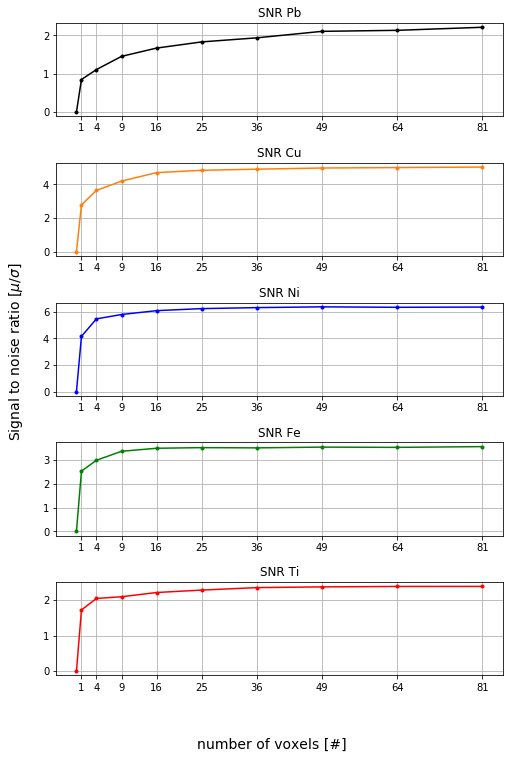

In [439]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 12))

plt.subplot(515)
plt.plot(num_pixels, SNR_Ti,'.-',color='r')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Ti')

plt.subplot(514)
plt.plot(num_pixels, SNR_Fe,'.-',color='g')
plt.title('SNR Fe')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(512)
plt.title('SNR Cu')
plt.plot(num_pixels, SNR_Cu,'.-',color='C1')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(511)
plt.title('SNR Pb')
plt.plot(num_pixels, SNR_Pb,'.-',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(513)
plt.title('SNR Ni') 
plt.plot(num_pixels, SNR_Ni,'.-',color='b')
plt.xticks(num_pixels[1:])
plt.grid()



plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'number of voxels [#]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=14)

plt.savefig('SNR.png', dpi=300)

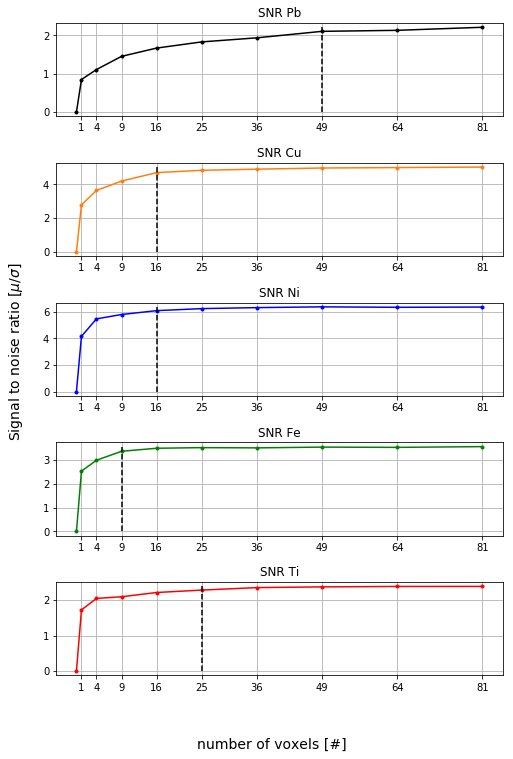

In [436]:
FE_ratio = SNR_Fe/np.mean(SNR_Fe[8:9])
Ni_ratio = SNR_Ni/np.mean(SNR_Ni[8:9])
Ti_ratio = SNR_Ti/np.mean(SNR_Ti[8:9])
Cu_ratio = SNR_Cu/np.mean(SNR_Cu[8:9])
Pb_ratio = SNR_Pb/np.mean(SNR_Pb[8:9])

# pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.7)
# pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.7)
# pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.7)
# pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.7)
# pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.7)

# pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.8)
# pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.8)
# pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.8)
# pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.8)
# pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.8)

pos_Fe = TOF_routines.find_nearest(FE_ratio, 0.95)
pos_Ni = TOF_routines.find_nearest(Ni_ratio, 0.95)
pos_Ti = TOF_routines.find_nearest(Ti_ratio, 0.95)
pos_Cu = TOF_routines.find_nearest(Cu_ratio, 0.95)
pos_Pb = TOF_routines.find_nearest(Pb_ratio, 0.95)


fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 12))

plt.subplot(515)
plt.plot(num_pixels, SNR_Ti,'.-',color='r')
plt.plot(np.array([num_pixels[pos_Ti],num_pixels[pos_Ti]]), np.array([np.min(SNR_Ti), np.max(SNR_Ti)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Ti')


plt.subplot(514)
plt.plot(num_pixels, SNR_Fe,'.-',color='g')
plt.plot(np.array([num_pixels[pos_Fe],num_pixels[pos_Fe]]), np.array([np.min(SNR_Fe), np.max(SNR_Fe)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()
plt.title('SNR Fe')

plt.subplot(512)
plt.title('SNR Cu')
plt.plot(num_pixels, SNR_Cu,'.-',color='C1')
plt.plot(np.array([num_pixels[pos_Cu],num_pixels[pos_Cu]]), np.array([np.min(SNR_Cu), np.max(SNR_Cu)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(511)
plt.title('SNR Pb')
plt.plot(num_pixels, SNR_Pb,'.-',color='k')
plt.plot(np.array([num_pixels[pos_Pb],num_pixels[pos_Pb]]), np.array([np.min(SNR_Pb), np.max(SNR_Pb)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()

plt.subplot(513)
plt.title('SNR Ni') 
plt.plot(num_pixels, SNR_Ni,'.-',color='b')
plt.plot(np.array([num_pixels[pos_Ni],num_pixels[pos_Ni]]), np.array([np.min(SNR_Ni), np.max(SNR_Ni)]), '--',color='k')
plt.xticks(num_pixels[1:])
plt.grid()



plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.04, 'number of voxels [#]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=14)

# plt.savefig('SNR_wih70TH.png', dpi=300)
plt.savefig('SNR_wih95TH.png', dpi=300)
# plt.savefig('SNR_wih80TH.png', dpi=300)

# print(FE_ratio[pos_Fe], SNR_Fe[pos_Fe], num_pixels[pos_Fe])

9.0
16.0


Text(0.5, 1.0, 'Ni')

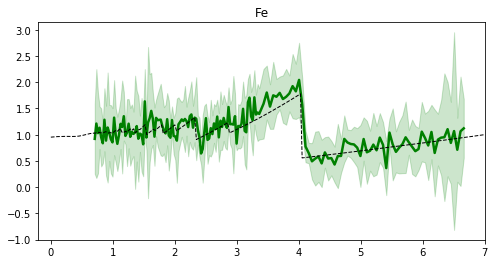

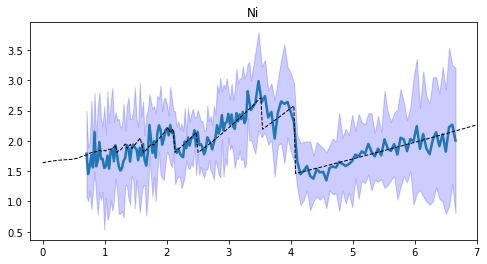

In [442]:
print(num_pixels[pos_Fe])
fig = plt.figure(figsize=(8, 4))
axFe = fig.add_subplot(111)
lineFe, = axFe.plot(lambda_bin, Fe_4D_av[pos_Fe,:],'g', linewidth=2.5)
fillFe = axFe.fill_between(lambda_bin, Fe_4D_av[pos_Fe,:]-1.96*Fe_4D_std[pos_Fe,:], Fe_4D_av[pos_Fe,:]+1.96*Fe_4D_std[pos_Fe,:], color='g', alpha=0.2)
axFe.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
axFe.set_xlim([-0.2,7])
axFe.set_title('Fe')

print(num_pixels[pos_Ni])
fig = plt.figure(figsize=(8, 4))
axNi = fig.add_subplot(111)
lineNi, = axNi.plot(lambda_bin, Ni_4D_av[pos_Ni,:], linewidth=2.5, label='measured Ni')
fillNi = axNi.fill_between(lambda_bin, Ni_4D_av[pos_Ni,:]-1.96*Ni_4D_std[pos_Ni,:], Ni_4D_av[pos_Ni,:]+1.96*Ni_4D_std[pos_Ni,:], color='b', alpha=0.2)
axNi.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
axNi.set_xlim([-0.2,7])
axNi.set_title('Ni') 

In [ ]:
# Here I try tomake some edge fitting on the given plots

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Z=Ti_4D_av/Bg_4D_std
# X=[]
# X = np.tile(pixel_num, (165,1))
# Y = np.tile(x_bins, (75,1))
# print(np.shape(X))
# print(np.shape(Y))
# print(len(pixel_num))
# print(np.shape(Z))
# ax.plot_surface(np.matrix.transpose(Y),X,Z)


# # in a smaller scale
# X=np.tile(pixel_num[0:25], (165,1))
# Y = np.tile(x_bins, (25,1))
# print(np.shape(X))
# print(np.shape(Y))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(np.matrix.transpose(Y),X,Z[0:165,0:25])